# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для воспроизводимости экспериментов")

Для воспроизводимости экспериментов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(frac=1).head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [8]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

### Ответ: есть пропуски в колонках mileage, engine, max_power, torque, seats

In [9]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [10]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [11]:
duplicated_train = df_train.drop('selling_price', axis=1)
duplicated_train = duplicated_train[duplicated_train.duplicated()]

print(f'Объекты с одинаковым признаковым описанием: {duplicated_train.shape[0]}')

Объекты с одинаковым признаковым описанием: 1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [12]:
duplicated_train.sort_values(by='name')

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1595,Audi Q5 35TDI Premium Plus,2018,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
2787,Audi Q5 35TDI Premium Plus,2018,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6778,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
3623,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
2293,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5652,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [13]:
df_train = df_train.drop_duplicates(subset=[column for column in df_train.columns if column != 'selling_price'], keep='first')
df_train.shape

(5840, 13)

In [14]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [15]:
df_train = df_train.reset_index(drop=True)
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

#### В трейне и тесте убираем единицы измерения в колонках mileage, engine, max_power и кастуем к float

In [16]:
for col in df_train[['mileage', 'engine', 'max_power']]:
    df_train[col] = df_train[col].str.split(' ', expand=True)[0]
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')

In [17]:
for col in df_test[['mileage', 'engine', 'max_power']]:
    df_test[col] = df_test[col].str.split(' ', expand=True)[0]
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce')

#### Проверяем

In [18]:
df_train[['mileage', 'engine', 'max_power']].dtypes

mileage      float64
engine       float64
max_power    float64
dtype: object

In [19]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          186
engine           186
max_power        184
torque           187
seats            186
dtype: int64

In [20]:
df_test[['mileage', 'engine', 'max_power']].dtypes

mileage      float64
engine       float64
max_power    float64
dtype: object

In [21]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

#### Смотрим на колонку torque. Видим, что есть 2 вида разделителей между Nm/kgm и rpm: @ и at. Заменим at на @:

In [22]:
df_train['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm', '200Nm@ 1750rpm',
       '115Nm@ 4000rpm', '69Nm@ 3500rpm', '172.5Nm@ 1750rpm',
       '6.1kgm@ 3000rpm', '60Nm@ 3500rpm', '90Nm@ 3500rpm',
       '151Nm@ 4850rpm', '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm',
       '250Nm@ 1750-2500rpm', '145Nm@ 4600rpm', '146Nm@ 4800rpm',
       '343Nm@ 1400-3400rpm', '200Nm@ 1400-3400rpm',
       '200Nm@ 1250-4000rpm', '400Nm@ 2000-2500rpm',
       '360Nm@ 1200-3400rpm', '200Nm@ 1200-3600rpm',
       '380Nm@ 1750-2500rpm', '400Nm@ 1750-3000rpm',
       '400Nm@ 1400-2800rpm', '200Nm@ 1750-3000rpm', '111.7Nm@ 4000rpm',
       '219.6Nm@ 1500-2750rpm', '112Nm@ 4000rpm', '250Nm@ 1500-3000rpm',
       '1

In [23]:
import re

def torque_func(df):
    '''
    Функция для преобразования колонки torque к нормальному виду:
    NM or KGM @ RPM
    Признак NM и KGM выносим в отдельную колонку
    
    '''
    temp_df = df
    temp_df['torque'] = temp_df['torque'].astype(str)
    
    # Создаем новую колонку, в которую запишем NM или KGM, для дальнейшего перевода к одной единице измерения
    temp_df['torque_indicator'] = temp_df['torque'].apply(lambda x: 'NM' if 'nm' in str(x).lower() else 'KGM' if 'kgm' in str(x).lower() else None)
    
    temp_df['torque'] = temp_df['torque'].replace('at', '@', regex=True).str.strip()
    temp_df['torque'] = temp_df['torque'].apply(lambda x: str(x) + '@' if isinstance(x, str) and '@' not in x else x)
    
    # с помощью регулярок приводим колонку к однотипному формату:
    temp_df['torque'] = temp_df['torque'].apply(lambda x: re.sub(r'\(.*\)', '', x)).str.strip()
    temp_df['torque'] = temp_df['torque'].apply(lambda x: re.sub(r'nm|NM|Nm|kgm|KGM|rpm|RPM', '', x)).str.strip()
    temp_df['torque'] = temp_df['torque'].replace('~', '-', regex=True).str.strip()
    temp_df['torque'] = temp_df['torque'].replace(',', '', regex=True).str.strip()
    temp_df['torque'] = temp_df['torque'].replace('/', '@', regex=True).str.strip()
    
    
    final_df = temp_df
    # заменяем значения вида хххх+@-500 на хххх, пунктов выше поменял / на @
    final_df['torque'] = final_df['torque'].str.replace(r'\+@-.+', '', regex=True)
    
    return final_df

In [24]:
def final_torque(df):
    # делим на 2 колонки и удаляем лишние пробелы
    # в списке было значение без указания RPM, т.е. вид: "400Nm"
    # для таких случаев во второй колонке указываем NaN
    df[['torque', 'max_torque_rpm']] = df['torque'].str.split('@', n=1, expand=True).replace('', np.nan)
    df['max_torque_rpm'] = df['max_torque_rpm'].replace('@', '', regex=True)
    # убираем лишние пробелы
    df['torque'] = df['torque'].str.strip()
    df['max_torque_rpm'] = df['max_torque_rpm'].str.strip()

    # оставляем максимальное значение хххх, где вид уууу-хххх
    df['max_torque_rpm'] = df['max_torque_rpm'].str.split('-').str[-1]
    
    df['torque'] = df['torque'].astype(float)
    df['max_torque_rpm'] = df['max_torque_rpm'].astype(float)
    
    final_df = df
    
    return final_df

In [25]:
def kgm_to_nm_convert(df):
    if df['torque_indicator'] == 'KGM':
        return df['torque'] * 9.80665
    else:
        return df['torque']

In [26]:
df_train = torque_func(df_train)

In [27]:
df_train[['name', 'torque', 'torque_indicator']].head() # промежуточный результат

,name,torque,torque_indicator
0,Maruti Swift Dzire VDI,190@ 2000,NM
1,Skoda Rapid 1.5 TDI Ambition,250@ 1500-2500,NM
2,Hyundai i20 Sportz Diesel,22.4 @ 1750-2750,KGM
3,Maruti Swift VXI BSIII,11.5@ 4500,KGM
4,Hyundai Xcent 1.2 VTVT E Plus,113.75@ 4000,NM


In [28]:
df_train = final_torque(df_train)

In [29]:
df_train[['name', 'torque', 'torque_indicator']].head() # результат до перевода в одну единицу измерения

,name,torque,torque_indicator
0,Maruti Swift Dzire VDI,190.00,NM
1,Skoda Rapid 1.5 TDI Ambition,250.00,NM
2,Hyundai i20 Sportz Diesel,22.40,KGM
3,Maruti Swift VXI BSIII,11.50,KGM
4,Hyundai Xcent 1.2 VTVT E Plus,113.75,NM


In [30]:
df_train['torque'] = df_train.apply(kgm_to_nm_convert, axis=1)

In [31]:
df_train[['name', 'torque', 'torque_indicator']].head() # результат после перевода в одну единицу измерения

,name,torque,torque_indicator
0,Maruti Swift Dzire VDI,190.000000,NM
1,Skoda Rapid 1.5 TDI Ambition,250.000000,NM
2,Hyundai i20 Sportz Diesel,219.668960,KGM
3,Maruti Swift VXI BSIII,112.776475,KGM
4,Hyundai Xcent 1.2 VTVT E Plus,113.750000,NM


In [32]:
df_test = torque_func(df_test)

In [33]:
df_test = final_torque(df_test)

In [34]:
df_test['torque'] = df_test.apply(kgm_to_nm_convert, axis=1)

In [35]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_indicator,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260.0,7.0,NM,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,260.0,5.0,NM,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,172.0,5.0,NM,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,200.0,5.0,NM,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,96.0,5.0,NM,3000.0


In [36]:
df_train = df_train.drop('torque_indicator', axis=1)

In [37]:
df_test = df_test.drop('torque_indicator', axis=1)

In [38]:
train_copy = df_train.copy()
test_copy = df_test.copy()

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [39]:
median_train = df_train.median(numeric_only=True)
df_train.fillna(median_train, inplace=True)
df_test.fillna(median_train, inplace=True)

In [40]:
df_train.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64

In [41]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [42]:
print("Полагаю, что дело в нелинейной зависимости между количеством посадочных мест с целевой переменной.\nТ.е. автомобили с 2 посадочными местами могут быть дороже, чем автомобили с 10 посадочными местами.\nДля учета этой нелинейности можно сделать переменную seats категориальной и закодировать её в дальнейшем.")

Полагаю, что дело в нелинейной зависимости между количеством посадочных мест с целевой переменной.
Т.е. автомобили с 2 посадочными местами могут быть дороже, чем автомобили с 10 посадочными местами.
Для учета этой нелинейности можно сделать переменную seats категориальной и закодировать её в дальнейшем.


In [43]:
correlation = df_train['seats'].corr(df_train['selling_price'])
print(f'Коэффициент корреляции: {correlation}')

Коэффициент корреляции: 0.14995346199535992


In [44]:
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype(int)

In [45]:
df_train['seats'].unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2])

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

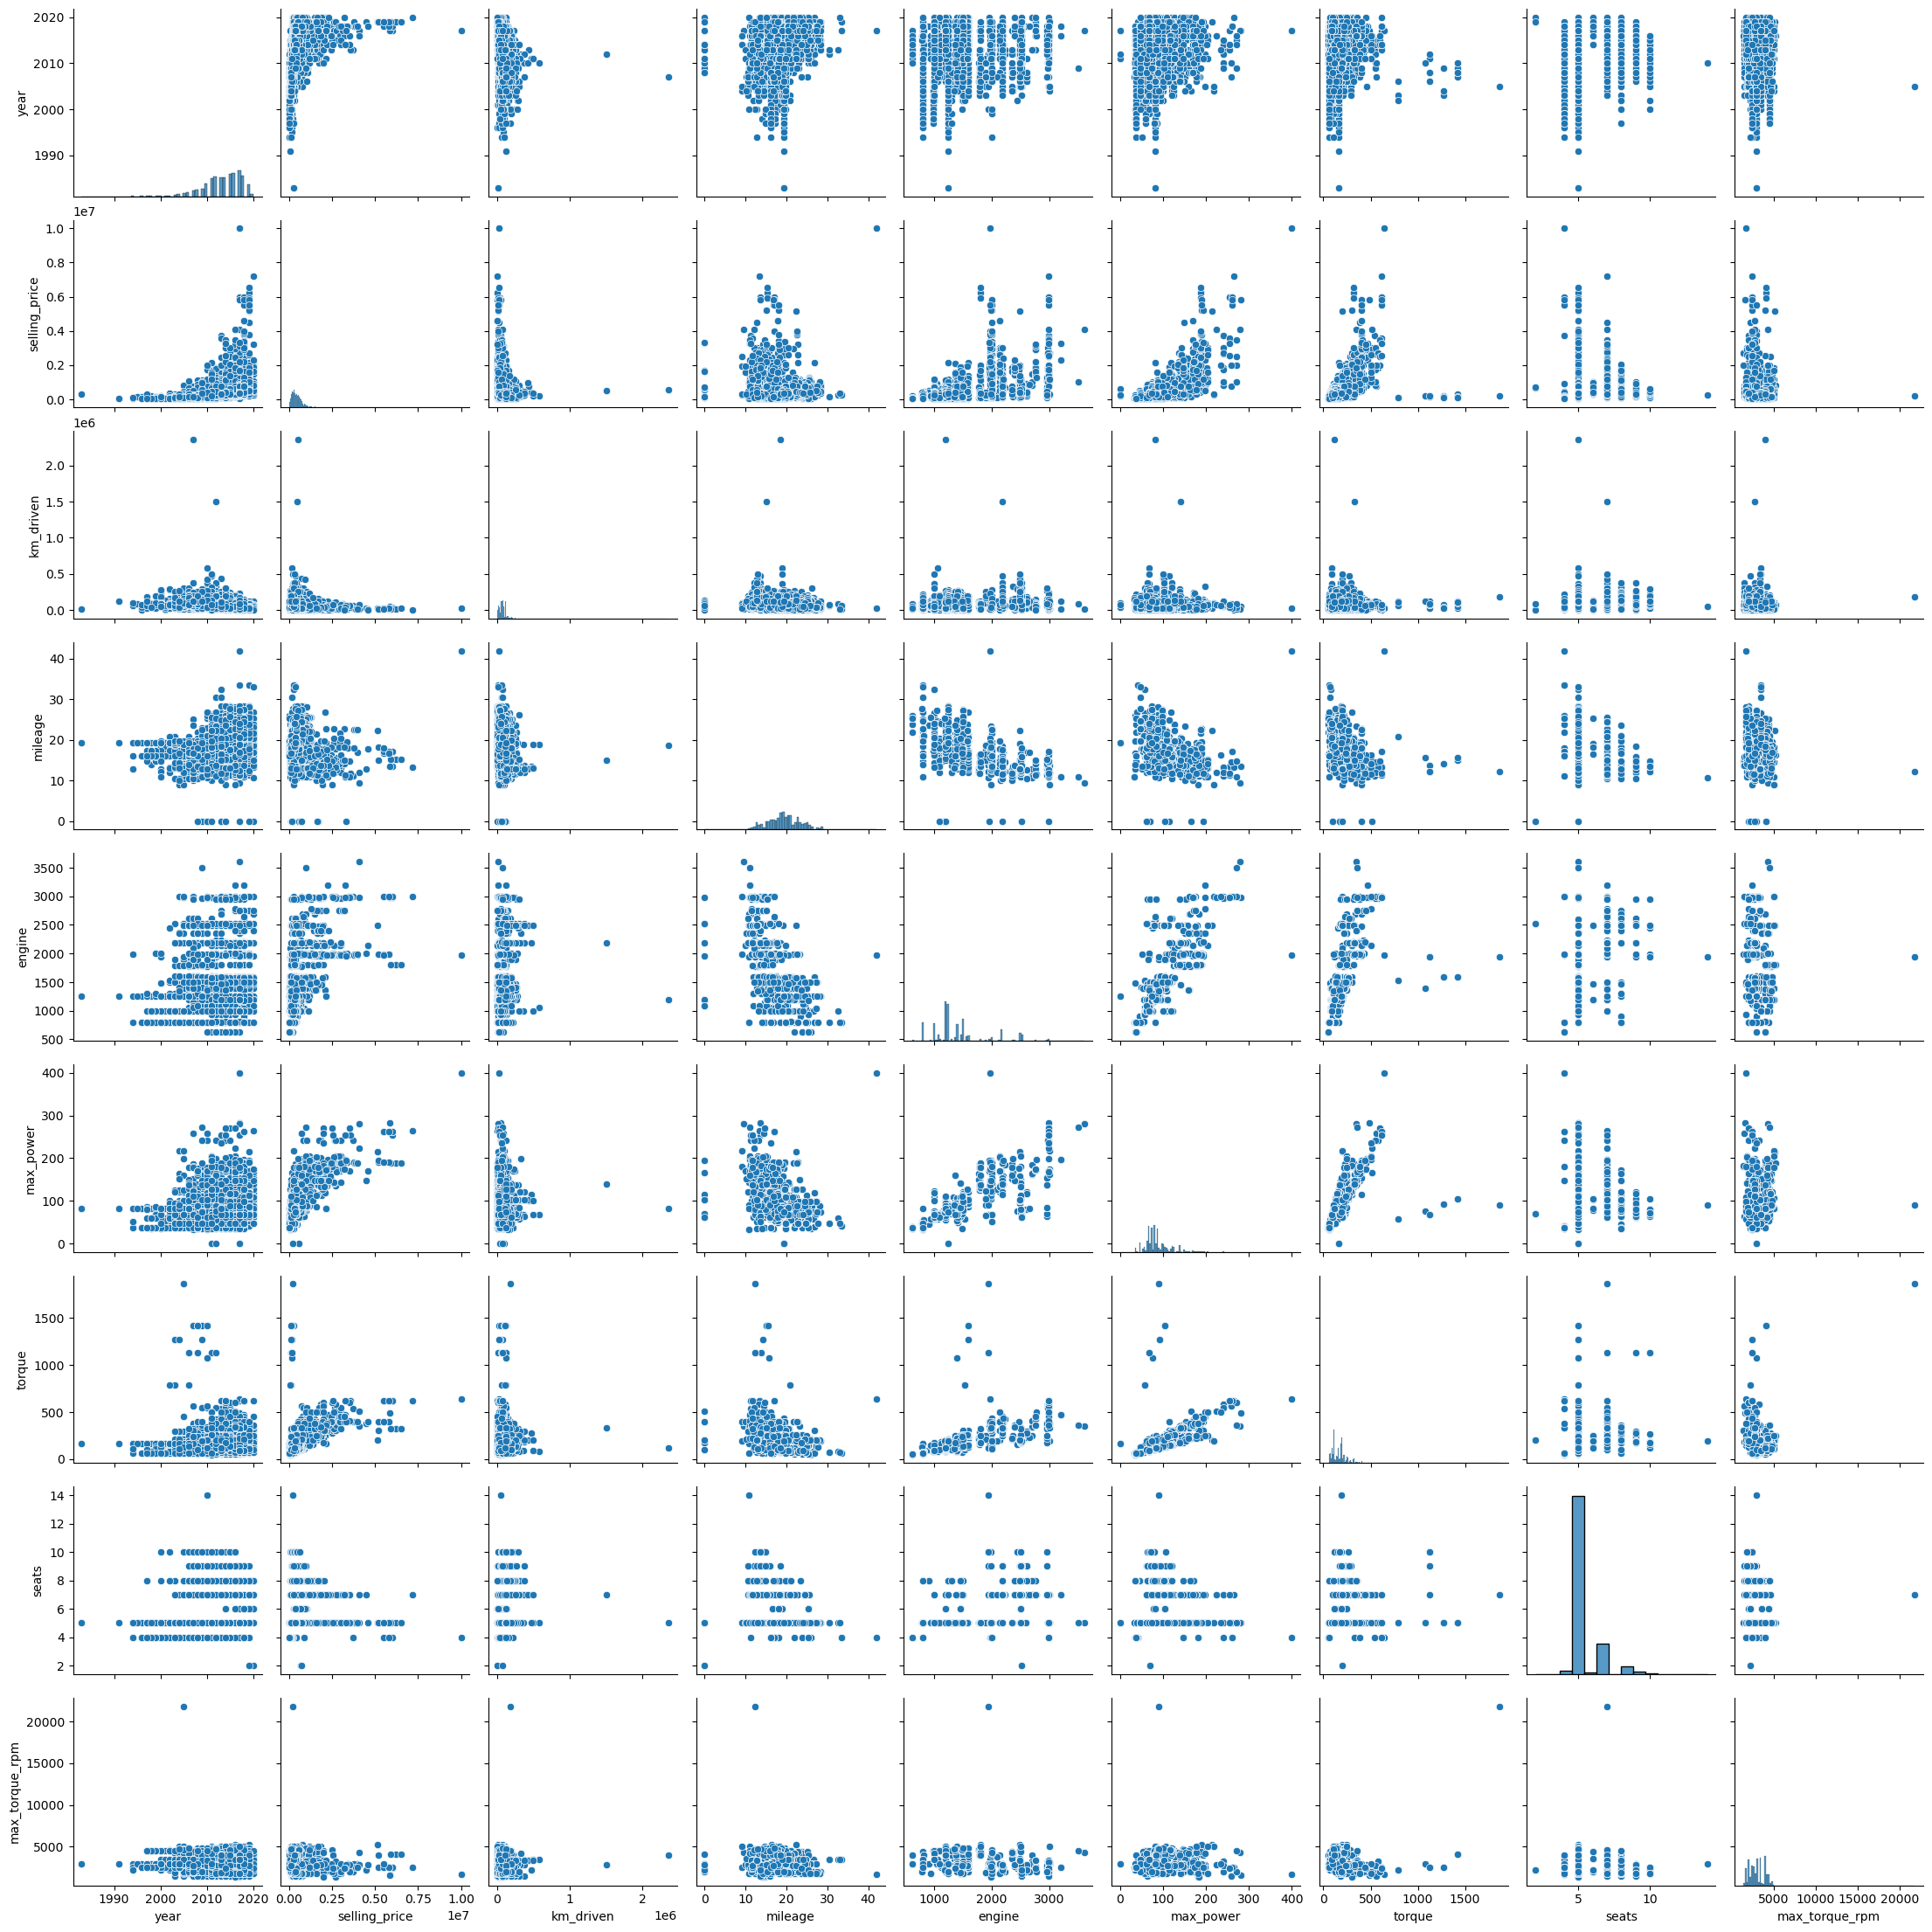

In [46]:
sns.pairplot(df_train)
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

__Пункт 1.__ На графиках видно, что переменные __year__, __max_power__ и __engine__, имеют тенденцию к увеличению __selling_price__ с увеличением их значений. Это указывает на потенциально положительную корреляцию этих переменных с __selling_price__.
Переменная __km_driven__ может показывать обратную связь с __selling_price__, где более высокий пробег может соответствовать более низкой цене продажи.
Остальные переменные, включая __mileage__, __seats__, и __max_torque_rpm__, не показывают явных тенденций по отношению к __selling_price__, что может указывать на слабую корреляцию.

__Пункт 2.__ Cуществует некоторая корреляция между __engine__ и __max_power__, так как более мощные двигатели обычно имеют больший объем.
Переменные __year__ и __km_driven__ могут иметь обратную корреляцию, где более новые автомобили обычно имеют меньший пробег.
Остальные переменные, включая __mileage__, __seats__, и __max_torque_rpm__, не показывают ясно выраженных корреляций между собой.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

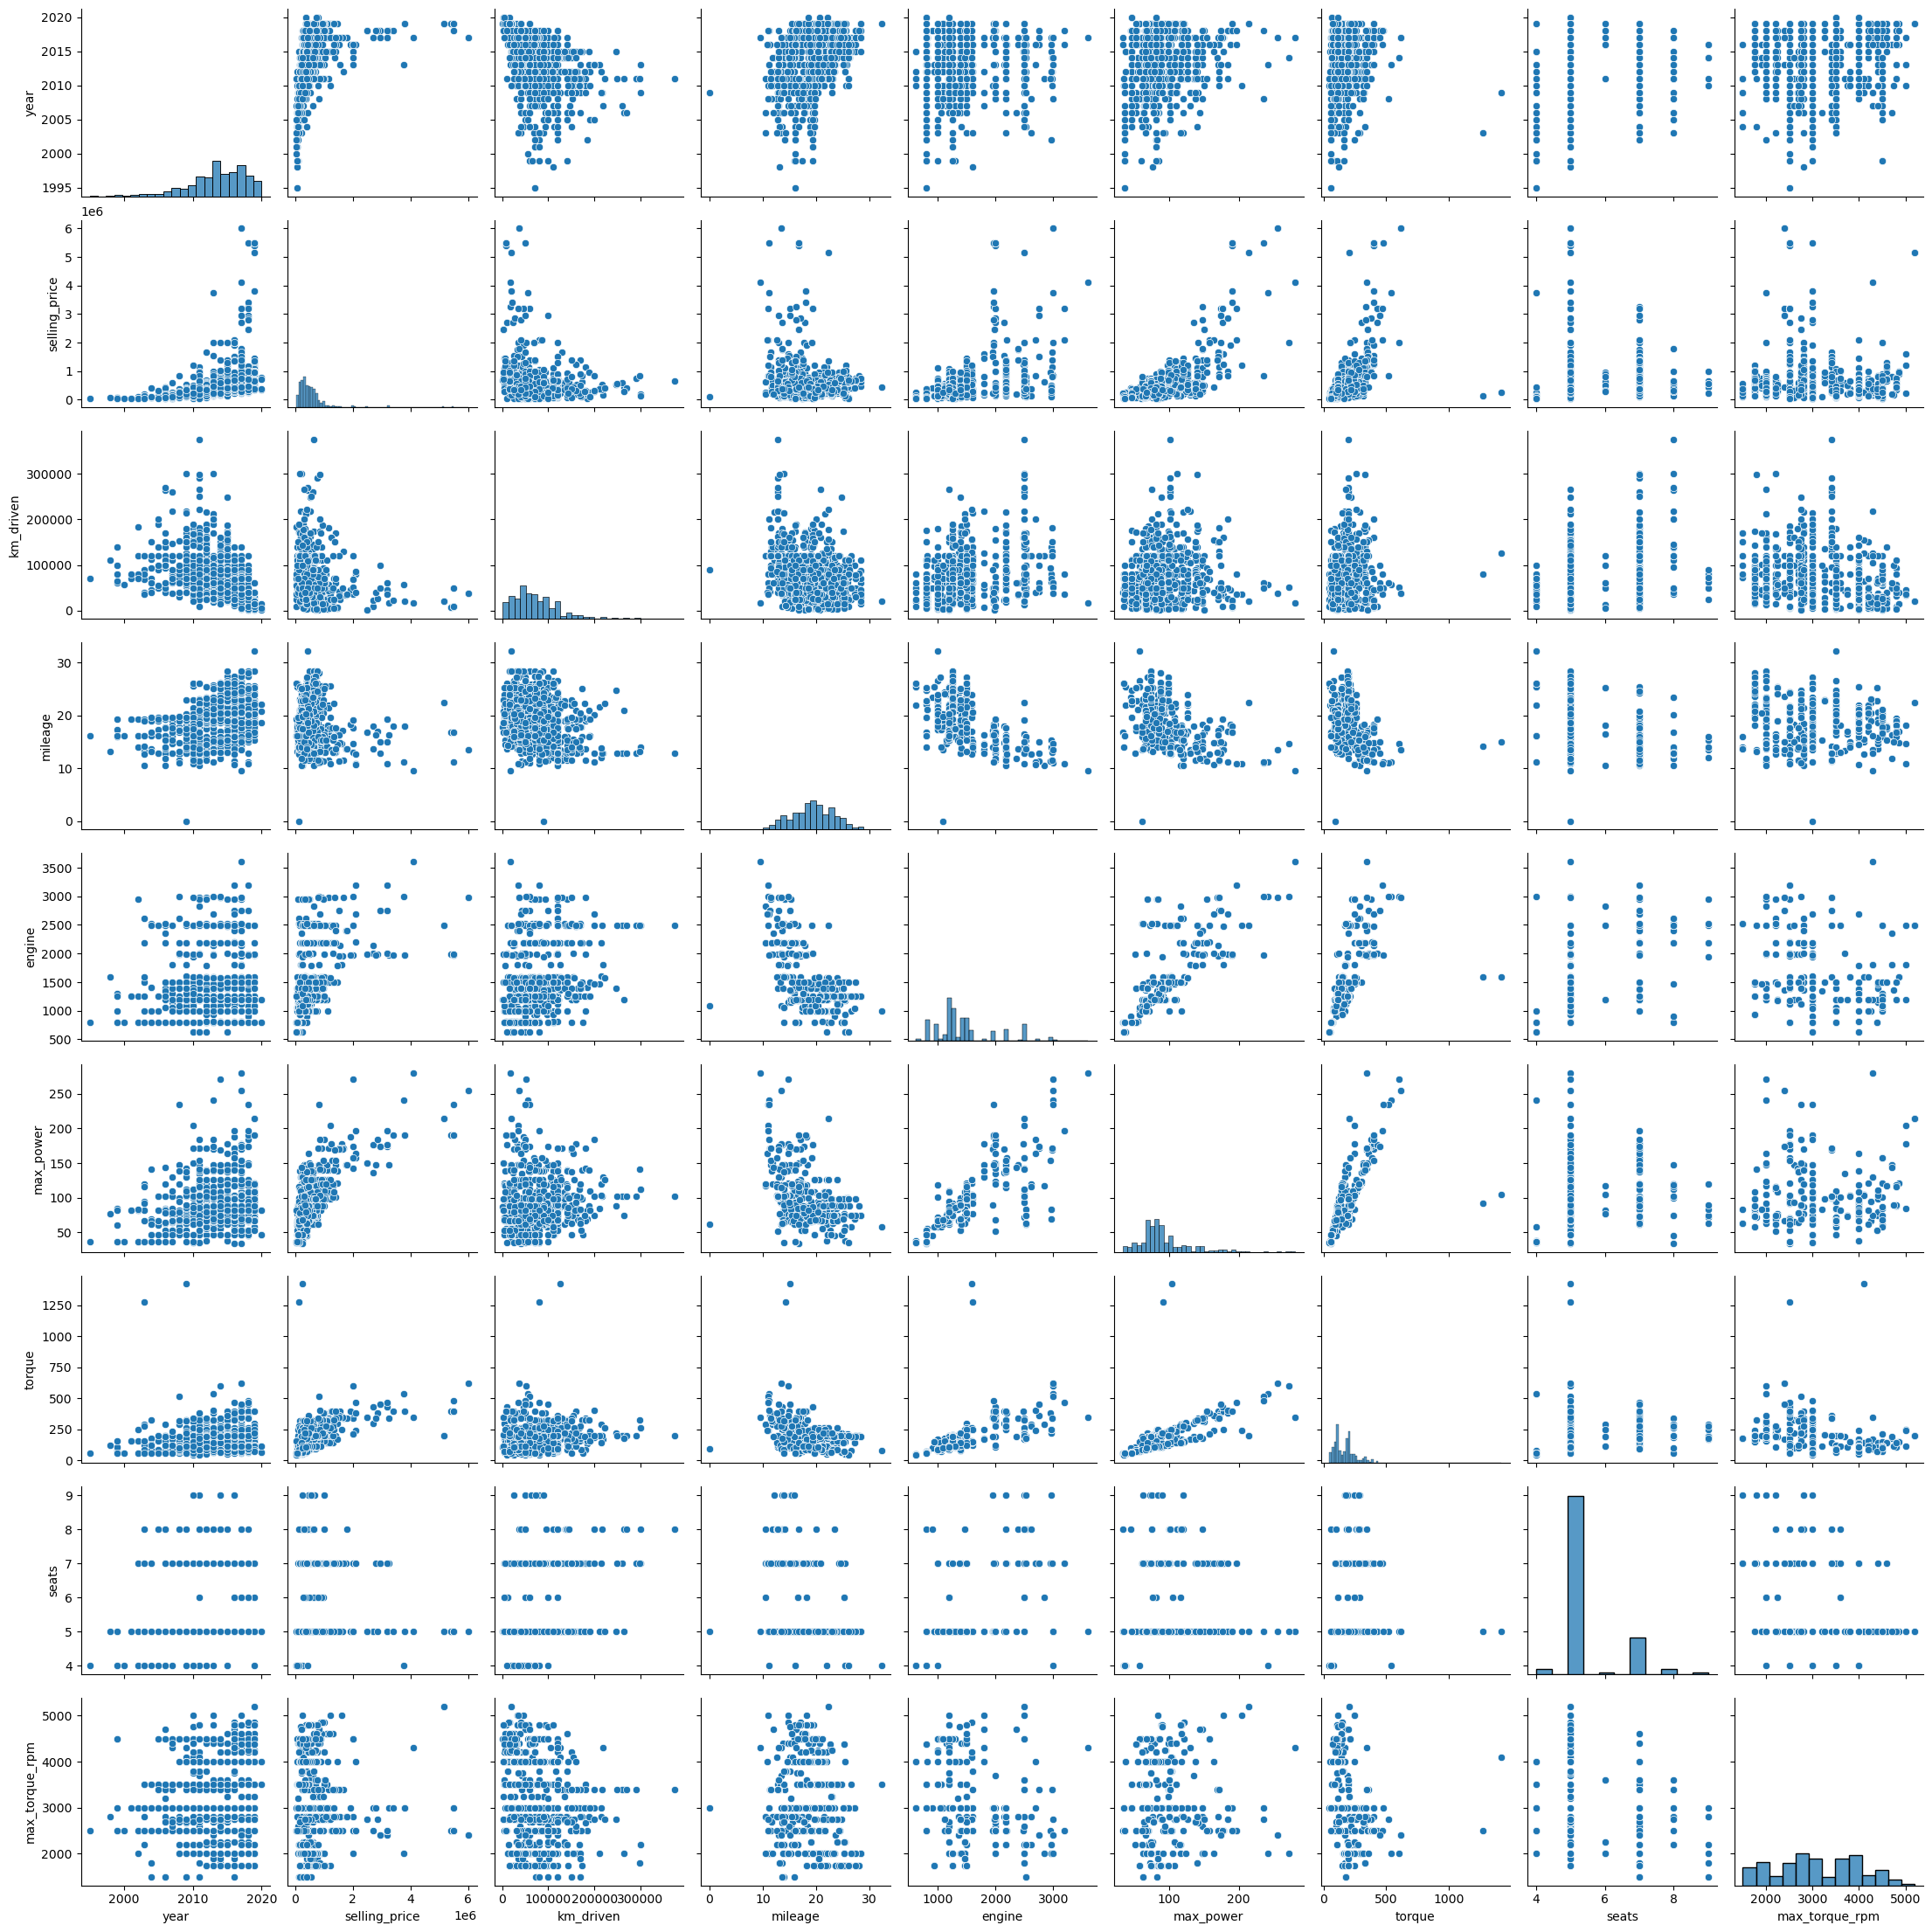

In [47]:
sns.pairplot(df_test)
plt.show()

#### В целом, df_train и df_test кажутся достаточно похожими.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [48]:
corr_train = df_train.corr(numeric_only=True)

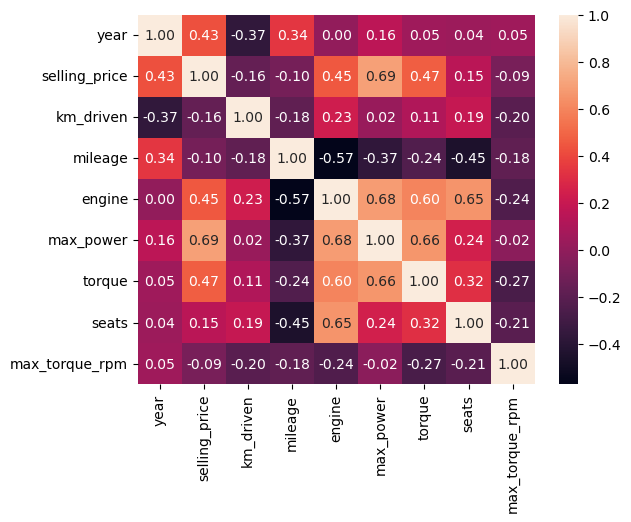

In [49]:
sns.heatmap(data=corr_train, annot=True, fmt=".2f")
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1. Наименее скоррелированные признаки - это те, у которых значение корреляции близкое к 0 (либо равно 0). По хитмапу видно, что это признаки "engine" и "year", корреляция между которыми равна 0.
2. Сильная положительная линейная зависимость наблюдается между "max_power" и "selling_price", корреляция равна 0.69.
3. Утверждение о том, что чем меньше год (т.е. чем старше автомобиль), тем больше километраж, можно считать верным. Корреляция между "year" и "km_driven" отрицательная и равна -0.37, что указывает на то, что с уменьшением года (то есть чем старше автомобиль) средний километраж увеличивается.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

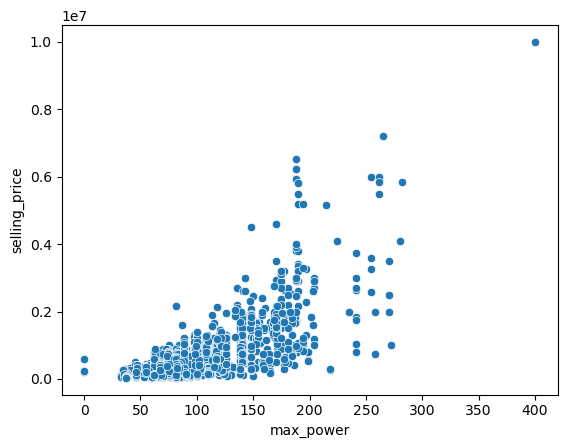

In [50]:
sns.scatterplot(x=df_train['max_power'], y=df_train['selling_price'])
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

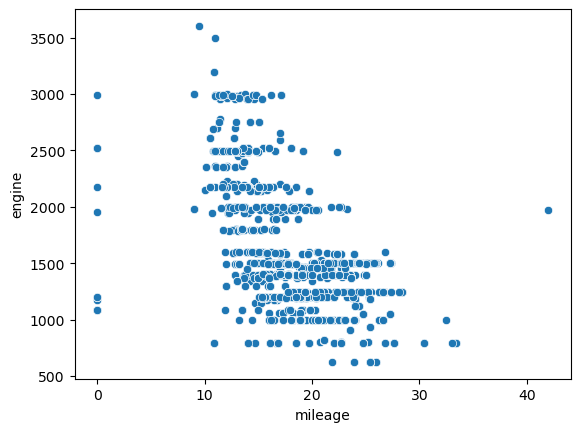

In [51]:
sns.scatterplot(x=df_train['mileage'], y=df_train['engine'])
plt.show()

Например, можно посмотреть на 2 признака с наибольшей отрицательной корреляцией: "engine" и "mileage". На графике видно, что с увеличением значения признака "mileage" снижается значение признака "engine".

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [52]:
y_train = df_train['selling_price']
X_train = df_train.drop(['selling_price', 'fuel', 'seller_type', 'transmission', 'owner', 'name'], axis=1)

In [53]:
#assert X_train.shape == (5840, 6) Я не удалял torque, а разделил на 2 столбца.

In [54]:
y_test = df_test['selling_price']
X_test = df_test.drop(['selling_price', 'fuel', 'seller_type', 'transmission', 'owner', 'name'], axis=1)

In [55]:
#assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV


def prediction(model, X_train, X_test, y_train, y_test):

    mod = model.fit(X_train, y_train)

    if isinstance(model, GridSearchCV):
        best_model = mod.best_estimator_
    else:
        best_model = mod

    pred_train = best_model.predict(X_train)
    pred_test = best_model.predict(X_test)

    r2_train = r2_score(y_train, pred_train)
    r2_test = r2_score(y_test, pred_test)
    MSE_train = MSE(y_train, pred_train)
    MSE_test = MSE(y_test, pred_test)

    print(f'r2 score train: {r2_train:.4f}\nr2 score test: {r2_test:.4f}')
    print(f'MSE train: {MSE_train:.4f}\nMSE test: {MSE_test:.4f}')
    
    return mod

In [57]:
lin_reg = prediction(LinearRegression(), X_train, X_test, y_train, y_test)

r2 score train: 0.6011
r2 score test: 0.6004
MSE train: 114330897498.8156
MSE test: 229701123522.2023


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [58]:
from sklearn.preprocessing import StandardScaler

scaled_Xtrain = pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns)
scaled_Xtest = pd.DataFrame(StandardScaler().fit_transform(X_test), columns=X_test.columns)

scaled_linreg = prediction(LinearRegression(), scaled_Xtrain, scaled_Xtest, y_train, y_test)

r2 score train: 0.6011
r2 score test: 0.5731
MSE train: 114330897498.8158
MSE test: 245378946899.4842


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [59]:
coef_df = pd.DataFrame({
    'Feature Name': X_test.columns[:8],
    'Coefficient': scaled_linreg.coef_,
})
coef_df.sort_values(by='Coefficient', ascending=False).iloc[:1]

,Feature Name,Coefficient
4,max_power,328812.59483


Наиболее информативный - "max_power"

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [60]:
from sklearn.linear_model import Lasso

lasso = prediction(Lasso(), scaled_Xtrain, scaled_Xtest, y_train, y_test)

r2 score train: 0.6011
r2 score test: 0.5731
MSE train: 114330897512.4025
MSE test: 245379795105.6753


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [61]:
lasso.coef_.tolist()

[165651.72259482305,
 -48953.43452811981,
 -8485.045857580368,
 22315.92593839607,
 328813.9977516593,
 7887.1756809811695,
 -30405.476355767107,
 -58859.113102339536]

L1-регуляризация не занулила веса. Есть 2 причины: 1.все признаки важны для предсказания целевой переменной; 2. между некоторыми признаками есть сильная корреляция.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [62]:
from sklearn.model_selection import GridSearchCV

grid_lasso = Lasso()
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 2000, 5000, 10000, 15000, 20000, 24000]}

grid_search = GridSearchCV(grid_lasso, params, cv=10)

gs = prediction(grid_search, scaled_Xtrain, scaled_Xtest, y_train, y_test)

r2 score train: 0.5943
r2 score test: 0.5463
MSE train: 116275585335.1895
MSE test: 260812851603.5639


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

10 фолдов * 14 параметров (params) = 140 моделей

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [63]:
gs.best_params_

{'alpha': 20000}

Коэффициент регуляризации у лучшей модели: alpha=20000

In [64]:
grid_coef_df = pd.DataFrame({
    'Feature Name': X_test.columns[:8],
    'Coefficient': gs.best_estimator_.coef_,
})
grid_coef_df[grid_coef_df['Coefficient'] == 0]

,Feature Name,Coefficient
2,mileage,0.0
3,engine,0.0
5,torque,0.0
6,seats,-0.0


Занулились веса для признаков "mileage", "engine", "torque", "seats".

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [65]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(max_iter=10000)

params_elastic = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 2000, 5000, 10000, 20000, 24000],
    'l1_ratio': [0.001, 0.01, 0.25, 0.5, 0.75, 1.0]
}
grid_search_elastic = GridSearchCV(elastic_net, params_elastic, cv=10)

gs_elastic = prediction(grid_search_elastic, scaled_Xtrain, scaled_Xtest, y_train, y_test)

r2 score train: 0.5943
r2 score test: 0.5463
MSE train: 116275585335.1895
MSE test: 260812851603.5639


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [66]:
gs_elastic.best_params_

{'alpha': 20000, 'l1_ratio': 1.0}

Лучшие гиперпараметры: alpha=20000, l1_ratio=1.0

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [67]:
X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)
X_train_cat.shape

(5840, 12)

In [68]:
X_test_cat = df_test.drop(['name', 'selling_price'], axis=1)
X_test_cat.shape

(1000, 12)

In [69]:
#assert X_train_cat.shape == (5840, 10) Я не удалял torque, а разделил на 2 столбца

In [70]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


In [71]:
X_test_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,534,837,877,623


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [72]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_cat['seats'] = X_train_cat['seats'].astype('category')
X_test_cat['seats'] = X_test_cat['seats'].astype('category')

def ohe_transform(df, ohe, cat_cols):
    
    encoded_data = ohe.transform(df[cat_cols])
    encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out())

    df = df.drop(cat_cols, axis=1)

    final_df = pd.concat([df, encoded_df], axis=1)

    return final_df

In [73]:
cat_cols = [col for col in X_train_cat.columns if X_train_cat[col].dtype in ['object', 'category']]
cat_cols

['fuel', 'seller_type', 'transmission', 'owner', 'seats']

In [74]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe.fit(X_train_cat[cat_cols])

encoded_train = ohe_transform(X_train_cat, ohe, cat_cols)
encoded_test = ohe_transform(X_test_cat, ohe, cat_cols)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [75]:
from sklearn.linear_model import Ridge


ridge = Ridge()
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000, 5000, 10000, 15000, 20000, 24000]}

grid_search_ridge = GridSearchCV(ridge, params, scoring='r2', cv=10)

gs_ridge = prediction(grid_search_ridge, encoded_train, encoded_test, y_train, y_test)

r2 score train: 0.6603
r2 score test: 0.6524
MSE train: 97371371277.7016
MSE test: 199781822585.1147


In [76]:
gs_ridge.best_score_

0.6276598130223409

После добавления категориальных признаков и использования GridSearchCV c Ridge регрессией получилось улучшить качество модели. Коэффициент детерминации на тесте равен ~0.65

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [77]:
final_xtrain = train_copy.drop(['selling_price'], axis=1)
final_xtest = test_copy.drop(['selling_price'], axis=1)

final_ytrain = train_copy['selling_price']
final_ytest = test_copy['selling_price']

final_xtrain.isna().sum()

name                0
year                0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           186
engine            186
max_power         184
torque            187
seats             186
max_torque_rpm    190
dtype: int64

In [78]:
from sklearn.impute import KNNImputer

# Обрабатываем пропуски
nan_cols = ['mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']

imputer = KNNImputer(n_neighbors=3, weights='uniform').fit(final_xtrain[nan_cols])

final_xtrain[nan_cols] = pd.DataFrame(imputer.transform(final_xtrain[nan_cols]), columns=nan_cols)
final_xtest[nan_cols] = pd.DataFrame(imputer.transform(final_xtest[nan_cols]), columns=nan_cols)

In [79]:
# Добавляем марку автомобиля и меняем тип seats
final_xtrain['name'] = final_xtrain['name'].str.split(' ', expand=True)[0].astype('category')
final_xtest['name'] = final_xtest['name'].str.split(' ', expand=True)[0].astype('category')

final_xtrain['seats'] = final_xtrain['seats'].astype('category')
final_xtest['seats'] = final_xtest['seats'].astype('category')

In [80]:
# Добавляем квадрат года и признак для автомобилей с 1 владельцем
final_xtrain['year_squared'] = final_xtrain['year'].apply(lambda x: x**2)
final_xtest['year_squared'] = final_xtest['year'].apply(lambda x: x**2)

final_xtrain['is_first_owner'] = final_xtrain['owner'].apply(lambda x: 1 if x == 'First Owner' else 0)
final_xtest['is_first_owner'] = final_xtest['owner'].apply(lambda x: 1 if x == 'First Owner' else 0)

In [81]:
categ_cols = [col for col in final_xtrain.columns if final_xtrain[col].dtype in ['category', 'object']]
categ_cols

['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

In [82]:
# Кодируем категориальные переменные
ohe_fin = OneHotEncoder(drop='first', sparse=False, handle_unknown='infrequent_if_exist')
ohe_fin.fit(final_xtrain[categ_cols])

encoded_train = ohe_transform(final_xtrain, ohe_fin, categ_cols)
encoded_test = ohe_transform(final_xtest, ohe_fin, categ_cols)

scaled_cols = encoded_train.columns[:8].tolist()
scaled_cols

['year',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'max_torque_rpm',
 'year_squared']

In [83]:
# Стандартизируем scaled_cols
final_scaler = StandardScaler().fit(encoded_train[scaled_cols])

encoded_train[scaled_cols] = pd.DataFrame(final_scaler.transform(encoded_train[scaled_cols]), columns=scaled_cols)
encoded_test[scaled_cols] = pd.DataFrame(final_scaler.transform(encoded_test[scaled_cols]), columns=scaled_cols)

In [84]:
# Логарифмируем целевую переменную
log_ytrain = np.log(final_ytrain)
log_ytest = np.log(final_ytest)

In [85]:
final_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000, 5000, 10000, 15000, 20000, 24000]}

final_ridge = Ridge()
final_model = GridSearchCV(final_ridge, final_params, scoring='r2', cv=10)

fin_res = prediction(final_model, encoded_train, encoded_test, log_ytrain, log_ytest)

r2 score train: 0.8880
r2 score test: 0.9148
MSE train: 0.0655
MSE test: 0.0609


#### Качество модели заметно улучшилось после Feature Engineering!

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [86]:
def business_metrics(y_true, y_pred):
    # Разница между предсказанной ценой и реальной
    absolute_diff = abs(y_pred - y_true)
    
    # Считаем количество предсказаний, укладывающихся в допустимый интервал (10% от цены)
    valid_preds = sum(absolute_diff <= 0.1 * y_true)

    # Рассчитываем долю предсказаний в допустимом интервале от общего числа предсказаний
    accuracy = valid_preds / len(y_true)
    
    return accuracy

preds = final_model.best_estimator_.predict(encoded_test)

print(f'{business_metrics(log_ytest, preds)*100:.0f}%')

100%


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link